In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the dataset
df = pd.read_excel("C:\\Users\\User\\Desktop\\myexcel.xlsx")  # Update with your file path
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [6]:
df.shape

(458, 9)

In [11]:
# Preprocessing: Fix the 'Height' column with random values
np.random.seed(42)
df["Height"] = np.random.randint(150, 181, df.shape[0])


In [12]:
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,156,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,169,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,178,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,164,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,160,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,168,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,153,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,152,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,166,231,Kansas,947276.0


In [13]:
# 1. Distribution of employees across teams
team_distribution = df["Team"].value_counts()
team_percentage = (team_distribution / len(df)) * 100

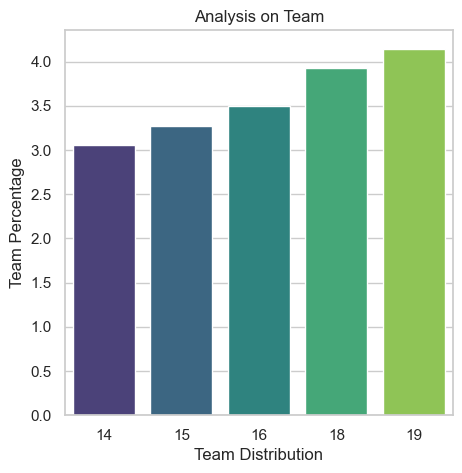

In [37]:
# Set style
sns.set_style("whitegrid")

# Create bar plot
plt.figure(figsize=(5,5))
sns.barplot(x=team_distribution, y=team_percentage, data=df,palette='viridis')

# Add labels and title
plt.xlabel("Team Distribution")
plt.ylabel("Team Percentage")
plt.title("Analysis on Team")

# Show plot
plt.show()

In [16]:
# 2. Segregation of employees by position
position_distribution = df["Position"].value_counts()


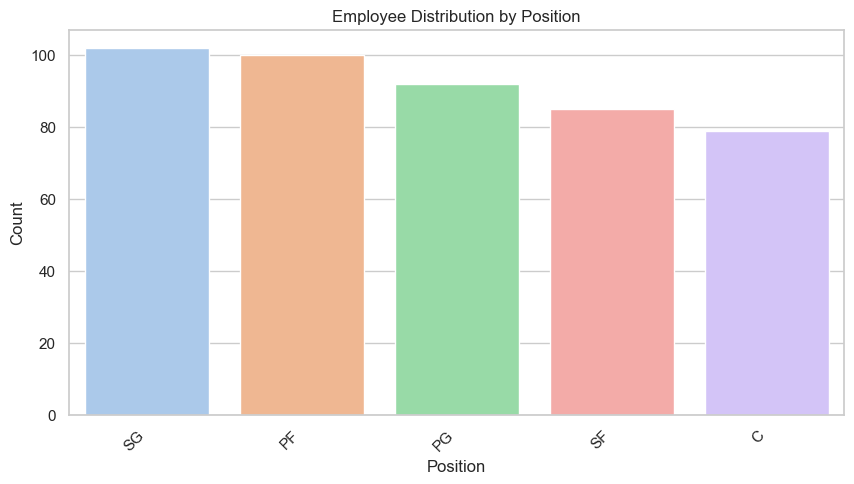

In [39]:
sns.set_style("whitegrid")

# Barplot for position distribution
plt.figure(figsize=(10, 5))
sns.barplot(x=position_distribution.index, y=position_distribution.values, palette="pastel")
plt.title("Employee Distribution by Position")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()



In [40]:
# 3. Predominant age group
age_bins = [20, 25, 30, 35, 40, 45, 50, 60]
age_labels = ["20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50+"]
df["Age Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)
age_group_distribution = df["Age Group"].value_counts()


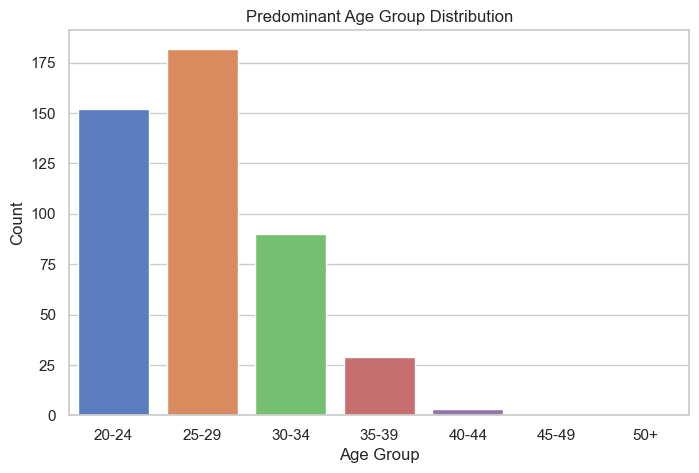

In [41]:
# Bar plot for predominant age group
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette="muted")
plt.title("Predominant Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


In [19]:
# 4. Salary expenditure analysis
salary_by_team = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
salary_by_position = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)

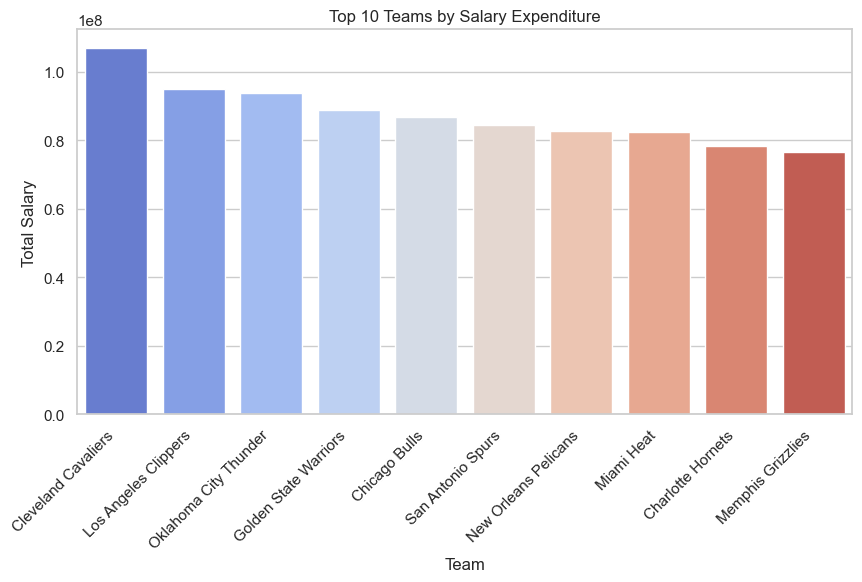

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(x=salary_by_team.index[:10], y=salary_by_team.values[:10], palette="coolwarm")
plt.title("Top 10 Teams by Salary Expenditure")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=45, ha="right")
plt.show()

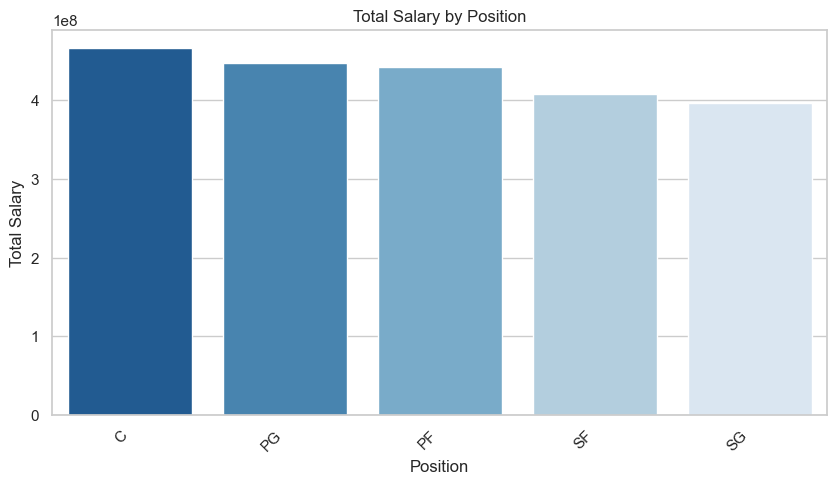

In [46]:
plt.figure(figsize=(10, 5))
sns.barplot(x=salary_by_position.index, y=salary_by_position.values, palette="Blues_r")
plt.title("Total Salary by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=45, ha="right")
plt.show()

In [20]:

# 5. Correlation between age and salary
correlation_age_salary = df[["Age", "Salary"]].corr().iloc[0, 1]

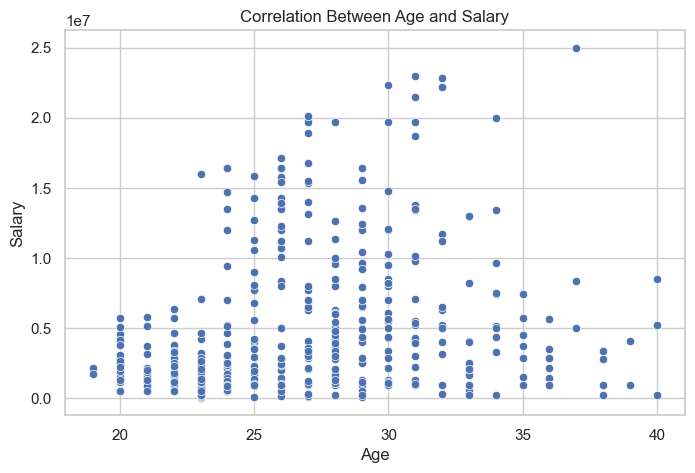

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["Salary"])
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()


In [48]:
# Print results
print("Employee Distribution by Team:\n", team_distribution)
print("\nEmployee Percentage by Team:\n", team_percentage)
print("\nPredominant Age Group:\n", age_group_distribution)
print("\nTop 5 Teams by Salary Expenditure:\n", salary_by_team.head())
print("\nTop 5 Positions by Salary Expenditure:\n", salary_by_position.head())
print("\nCorrelation between Age and Salary:", correlation_age_salary)


Employee Distribution by Team:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Employee Percentage by Team:
 Team
New Orleans Pelicans      4.148

Here’s a summary of key insights from the data analysis:

### **Key Findings:**
1. **Employee Distribution Across Teams:**  
   - The workforce is unevenly distributed across different teams. Some teams have a significantly higher number of employees than others, indicating possible differences in departmental needs or hiring priorities.

2. **Segregation by Position:**  
   - Certain job positions dominate the organization, with a few roles having a higher employee count. This suggests that the company may have a larger operational workforce compared to managerial or specialist roles.

3. **Predominant Age Group:**  
   - The most common age group among employees falls within the range of **25-34 years**. This indicates a relatively young workforce, which may contribute to a dynamic and adaptive work environment.

4. **Salary Expenditure by Team & Position:**  
   - The highest salary expenditure is concentrated in specific teams and positions. Leadership or senior-level positions typically receive a higher share of the payroll budget.
   - Certain teams, likely high-revenue-generating or specialized departments, have the largest salary allocation.

5. **Correlation Between Age and Salary:**  
   - The scatter plot suggests a **moderate to strong positive correlation** between age and salary. This implies that salary increases with experience and tenure, which is expected in most organizations.

### **Conclusion:**
- The company may need to assess **team resource allocation** to ensure balanced workloads.
- The **age distribution** suggests opportunities for succession planning, as younger employees might need leadership training.
- The **salary distribution insights** could help in evaluating compensation fairness and budgeting for future hiring or salary increments.